In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sp
from scipy.integrate import odeint

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('talk', font_scale=0.9,  rc={"lines.linewidth": 5})

### Constantes

In [3]:
m = 10.0 #Massa

### Definição da força em coordenadas cartesianas

In [37]:
def F(r,v,t):
    """
    Vetor força.
    
    :param r: Vetor posição no instante t (array com 3 componentes)
    :param v: Vetor velocidade no instante t (array com 3 componentes)
    :param t: instante de tempo
    
    :return: Vetor força (array com 3 componentes)
    """
    #Força elástica
    Fk = -1.0*r
    #Força resistiva proposcional à v
    Fres = -0.5*v
    #Força total
    return  Fk+Fres

### Definição da posição e velocidade no instante t = t0

In [38]:
x0,y0,z0 = -1.0,1.0,3.0
r0 = np.array([x0,y0,z0])
vx0,vy0,vz0 = 0.0,0.0,0.0 #Corpo inicialmente em repouso
v0 = np.array([vx0,vy0,vz0])

### Solução das eqs. de movimento:

In [42]:
#Formato: w[t] = [r(t),v(t)], dw/dt = [dr/dt,dv/dt] = [v(t),F/m]
def RHS(w,t):
    r = w[:3] #vetor posição
    v = w[3:] #vetor velocidade
    return np.hstack((v,F(r,v,t)/m)) #lado direito das eqs diferenciais

w0 = np.hstack((r0,v0)) #Condições iniciais

t0 = 0 #instante no qual as condições iniciais são definidas
tf = 100 #instante final para calcular as soluções
n = 1000 #número de pontos entre t0 e tf para calcular as soluções

tlist = np.linspace(t0,tf,n) #lista de valores para calcular as soluções r(t) e v(t)

w_sol = odeint(RHS,w0,tlist) #Solução

r_sol = w_sol[:,:3] #r(t) calculado em tlist
v_sol = w_sol[:,3:] #v(t) calculado em tlist


### Plot da solução

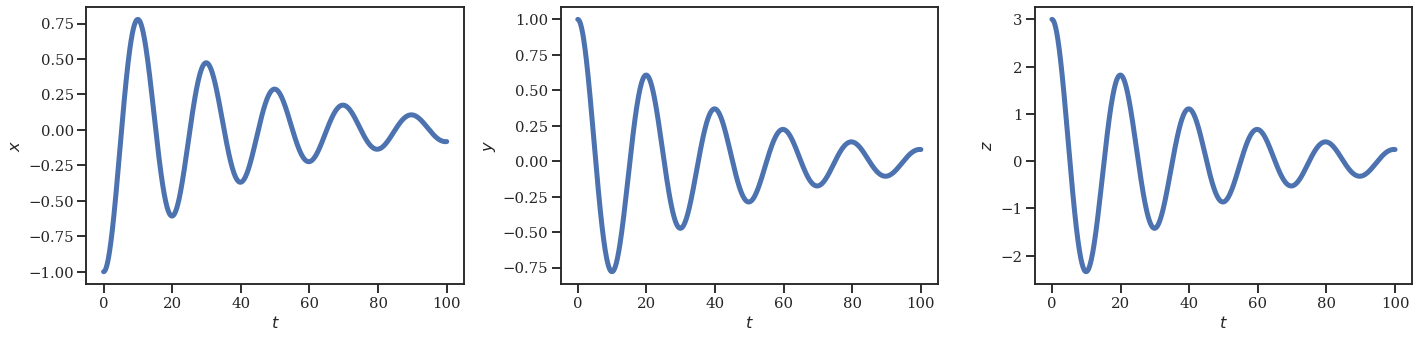

In [43]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
ax_labels = [r'$x$',r'$y$',r'$z$']

for i in range(3): #Loop sobre dimensões
    axes[i].plot(tlist,r_sol[:,i])
    axes[i].set_xlabel(r'$t$')
    axes[i].set_ylabel(ax_labels[i])
plt.tight_layout()
plt.show()

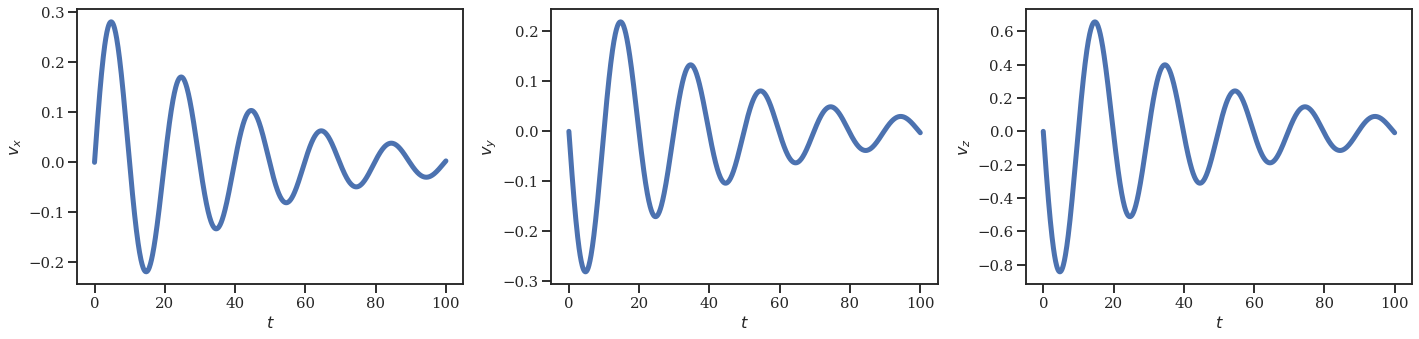

In [44]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
ax_labels = [r'$v_x$',r'$v_y$',r'$v_z$']

for i in range(3): #Loop sobre dimensões
    axes[i].plot(tlist,v_sol[:,i])
    axes[i].set_xlabel(r'$t$')
    axes[i].set_ylabel(ax_labels[i])
plt.tight_layout()
plt.show()